In [1]:
import pandas as pd
import numpy as np

## Part 2: Analyzing timestamp data for patterns

In [2]:
ts = pd.read_csv("streaming_data_Aby.csv")
ts

,Unnamed: 0,endTime
0,0,2022-09-26 20:41
1,1,2022-09-26 20:46
2,2,2022-09-26 20:49
3,3,2022-09-26 20:52
4,4,2022-09-26 20:57
...,...,...
8881,8881,2023-03-07 20:51
8882,8882,2023-03-07 20:51
8883,8883,2023-03-07 20:51
8884,8884,2023-03-07 20:51


In [3]:
dateTimes = pd.DataFrame()

### Making the timestamps in datetime format

In [4]:
dateTimes["endTime"] = pd.to_datetime(ts["endTime"])
dateTimes

,endTime
0,2022-09-26 20:41:00
1,2022-09-26 20:46:00
2,2022-09-26 20:49:00
3,2022-09-26 20:52:00
4,2022-09-26 20:57:00
...,...
8881,2023-03-07 20:51:00
8882,2023-03-07 20:51:00
8883,2023-03-07 20:51:00
8884,2023-03-07 20:51:00


### Creating a new collumn that tracks the time interval between each timestamp

In [5]:
dateTimes["diff"] = dateTimes.diff()

In [6]:
dateTimes

,endTime,diff
0,2022-09-26 20:41:00,NaT
1,2022-09-26 20:46:00,0 days 00:05:00
2,2022-09-26 20:49:00,0 days 00:03:00
3,2022-09-26 20:52:00,0 days 00:03:00
4,2022-09-26 20:57:00,0 days 00:05:00
...,...,...
8881,2023-03-07 20:51:00,0 days 00:00:00
8882,2023-03-07 20:51:00,0 days 00:00:00
8883,2023-03-07 20:51:00,0 days 00:00:00
8884,2023-03-07 20:51:00,0 days 00:00:00


### Answer: What is the longest time between timestamps? What is the average time between timestamps?

The longest time between timestamps:

In [7]:
dateTimes["diff"].max()

Timedelta('8 days 21:40:00')

The average time between timestamps:

In [8]:
dateTimes["diff"].mean()

Timedelta('0 days 00:26:15.416994935')

### Answer: What is the day with the most timestamps? How many events (timestamps) were on that day?

In [9]:
# creating a df with just the dates and no h/m/s timestamps
days = dateTimes["endTime"].dt.strftime("%Y-%m-%d")
days

0       2022-09-26
1       2022-09-26
2       2022-09-26
3       2022-09-26
4       2022-09-26
           ...    
8881    2023-03-07
8882    2023-03-07
8883    2023-03-07
8884    2023-03-07
8885    2023-03-07
Name: endTime, Length: 8886, dtype: object

In [10]:
# Iterating over days and summing number of timestamps per day
dayCount = {}
for day in days:
    if day not in dayCount:
        dayCount[day] = 0
    dayCount[day] = dayCount[day] + 1
dayCount

{'2022-09-26': 16,
 '2022-09-27': 57,
 '2022-09-28': 158,
 '2022-09-29': 114,
 '2022-09-30': 33,
 '2022-10-01': 71,
 '2022-10-02': 97,
 '2022-10-03': 116,
 '2022-10-04': 73,
 '2022-10-05': 39,
 '2022-10-06': 36,
 '2022-10-07': 41,
 '2022-10-08': 8,
 '2022-10-09': 13,
 '2022-10-15': 13,
 '2022-10-16': 117,
 '2022-10-17': 23,
 '2022-10-18': 116,
 '2022-10-19': 49,
 '2022-10-20': 70,
 '2022-10-21': 103,
 '2022-10-22': 43,
 '2022-10-23': 13,
 '2022-10-24': 56,
 '2022-10-25': 71,
 '2022-10-26': 131,
 '2022-10-27': 67,
 '2022-10-28': 105,
 '2022-10-29': 60,
 '2022-10-30': 22,
 '2022-10-31': 42,
 '2022-11-01': 25,
 '2022-11-02': 29,
 '2022-11-03': 43,
 '2022-11-04': 47,
 '2022-11-05': 9,
 '2022-11-06': 30,
 '2022-11-07': 59,
 '2022-11-08': 110,
 '2022-11-09': 33,
 '2022-11-11': 10,
 '2022-11-12': 20,
 '2022-11-14': 16,
 '2022-11-16': 15,
 '2022-11-20': 4,
 '2022-11-29': 50,
 '2022-11-30': 125,
 '2022-12-01': 63,
 '2022-12-02': 65,
 '2022-12-03': 65,
 '2022-12-04': 25,
 '2022-12-05': 148,
 '20

The day with the most timestamps:

In [11]:
maxUse = -1
maxDay = None
for day in dayCount:
    if dayCount[day] > maxUse:
        maxUse = dayCount[day]
        maxDay = day
print(maxDay)

2023-01-26


How many timestamps were on that day?

In [12]:
print(maxUse)

304


### Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

In [13]:
months = dateTimes["endTime"].dt.strftime("%Y-%m")
months

0       2022-09
1       2022-09
2       2022-09
3       2022-09
4       2022-09
         ...   
8881    2023-03
8882    2023-03
8883    2023-03
8884    2023-03
8885    2023-03
Name: endTime, Length: 8886, dtype: object

In [14]:
monthCount = {}
for month in months:
    if month not in monthCount:
        monthCount[month] = 0
    monthCount[month] = monthCount[month] + 1
monthCount

{'2022-09': 378,
 '2022-10': 1595,
 '2022-11': 625,
 '2022-12': 1060,
 '2023-01': 2018,
 '2023-02': 2515,
 '2023-03': 695}

month with the most timestamps:

In [15]:
maxMonthUse = -1
maxMonth = None
for month in monthCount:
    if monthCount[month] > maxMonthUse:
        maxMonthUse = monthCount[month]
        maxMonth = month
print(maxMonth)

2023-02


the amount of timestamps in that month:

In [16]:
print(maxMonthUse)

2515


### Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning. What other data might help you verify if you are correct?

From the title of the csv file I know it has to do with streaming data. I think that the timestamps in the data could be random checks while watching a show and or pausing a show. The timestamps are quite frequent making me think that it might not be counting when a show is started or when it ends.

### Exchange your analysis with your partner. Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?

### For the days and months that your partner identified as having the most timestamps, try to figure out what was happening on those days. What other data might help you figure this out?

### Discuss your results together -- what did you learn about yourself and your partner through doing this?

In [17]:
ts2 = pd.read_csv("Project8_Miles_Timestamps.csv")
# original data was not in time order so this sorts it without creating a new df
ts2.sort_values(by="saved_saved_media/string_map_data/Saved on/timestamp", inplace=True)
ts2

,saved_saved_media/string_map_data/Saved on/timestamp
78,1515107388
77,1516250723
76,1516250744
75,1516250771
74,1516427434
...,...
883,1680491179
882,1680537314
881,1680537351
880,1680623867


In [18]:
dateTimes2 = pd.DataFrame()

In [19]:
dateTimes2["time"] = pd.to_datetime(ts2["saved_saved_media/string_map_data/Saved on/timestamp"],unit="s")
dateTimes2

,time
78,2018-01-04 23:09:48
77,2018-01-18 04:45:23
76,2018-01-18 04:45:44
75,2018-01-18 04:46:11
74,2018-01-20 05:50:34
...,...
883,2023-04-03 03:06:19
882,2023-04-03 15:55:14
881,2023-04-03 15:55:51
880,2023-04-04 15:57:47


In [20]:
dateTimes2["diff"] = dateTimes2.diff()

### Answer: What is the longest time between timestamps? What is the average time between timestamps?

The longest time between timestamps is:

In [21]:
dateTimes2["diff"].max()

Timedelta('71 days 22:55:09')

The average time between timestamps:

In [22]:
dateTimes2["diff"].mean()

Timedelta('1 days 23:00:39.882413087')

### Answer: What is the day with the most timestamps? How many events (timestamps) were on that day?

In [23]:
days2 = dateTimes2["time"].dt.strftime("%Y-%m-%d")
days2

78     2018-01-04
77     2018-01-18
76     2018-01-18
75     2018-01-18
74     2018-01-20
          ...    
883    2023-04-03
882    2023-04-03
881    2023-04-03
880    2023-04-04
879    2023-04-04
Name: time, Length: 979, dtype: object

In [24]:
# Iterating over days and summing number of timestamps per day
dayCount2 = {}
for day2 in days2:
    if day2 not in dayCount2:
        dayCount2[day2] = 0
    dayCount2[day2] = dayCount2[day2] + 1
dayCount2

{'2018-01-04': 1,
 '2018-01-18': 3,
 '2018-01-20': 15,
 '2018-01-26': 9,
 '2018-02-02': 11,
 '2018-02-20': 1,
 '2018-04-17': 1,
 '2018-04-26': 1,
 '2018-04-27': 1,
 '2018-05-08': 1,
 '2018-05-15': 1,
 '2018-05-17': 1,
 '2018-05-23': 1,
 '2018-05-29': 1,
 '2018-05-31': 1,
 '2018-06-08': 1,
 '2018-06-09': 1,
 '2018-06-13': 3,
 '2018-06-27': 1,
 '2018-06-30': 1,
 '2018-07-12': 1,
 '2018-07-18': 2,
 '2018-07-24': 1,
 '2018-07-29': 2,
 '2018-08-02': 1,
 '2018-08-03': 1,
 '2018-08-06': 1,
 '2018-08-10': 2,
 '2018-08-13': 2,
 '2018-08-24': 2,
 '2018-08-29': 1,
 '2018-08-31': 1,
 '2018-09-06': 1,
 '2018-09-07': 2,
 '2018-09-20': 1,
 '2018-09-22': 1,
 '2018-09-25': 1,
 '2018-09-28': 1,
 '2018-09-30': 2,
 '2018-10-04': 1,
 '2018-10-05': 2,
 '2018-10-10': 1,
 '2018-10-18': 1,
 '2018-10-22': 1,
 '2018-10-31': 1,
 '2018-11-11': 1,
 '2018-11-13': 1,
 '2018-11-14': 1,
 '2018-11-20': 1,
 '2018-11-21': 1,
 '2018-11-25': 1,
 '2018-12-04': 1,
 '2018-12-09': 1,
 '2018-12-10': 1,
 '2018-12-11': 2,
 '2018-1

The day with the most timestamps:

In [25]:
maxUse2 = -1
maxDay2 = None
for day2 in dayCount2:
    if dayCount2[day2] > maxUse2:
        maxUse2 = dayCount2[day2]
        maxDay2 = day2
print(maxDay2)

2023-03-28


How many timestamps were on that day?

In [26]:
print(maxUse2)

26


### Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

In [27]:
months2 = dateTimes2["time"].dt.strftime("%Y-%m")
months2

78     2018-01
77     2018-01
76     2018-01
75     2018-01
74     2018-01
        ...   
883    2023-04
882    2023-04
881    2023-04
880    2023-04
879    2023-04
Name: time, Length: 979, dtype: object

In [28]:
monthCount2 = {}
for month2 in months2:
    if month2 not in monthCount2:
        monthCount2[month2] = 0
    monthCount2[month2] = monthCount2[month2] + 1
monthCount2

{'2018-01': 28,
 '2018-02': 12,
 '2018-04': 3,
 '2018-05': 6,
 '2018-06': 7,
 '2018-07': 6,
 '2018-08': 11,
 '2018-09': 9,
 '2018-10': 7,
 '2018-11': 6,
 '2018-12': 17,
 '2019-01': 21,
 '2019-02': 3,
 '2019-03': 20,
 '2019-04': 9,
 '2019-05': 9,
 '2019-06': 3,
 '2019-07': 2,
 '2019-08': 2,
 '2019-09': 1,
 '2019-10': 10,
 '2019-12': 1,
 '2020-01': 4,
 '2020-02': 11,
 '2020-03': 10,
 '2020-04': 8,
 '2020-05': 10,
 '2020-06': 7,
 '2020-07': 8,
 '2020-08': 1,
 '2020-09': 5,
 '2020-10': 4,
 '2020-11': 1,
 '2020-12': 2,
 '2021-01': 1,
 '2021-03': 5,
 '2021-06': 1,
 '2021-07': 2,
 '2021-08': 2,
 '2021-09': 7,
 '2021-10': 11,
 '2021-11': 1,
 '2021-12': 6,
 '2022-01': 5,
 '2022-02': 4,
 '2022-03': 3,
 '2022-04': 4,
 '2022-05': 2,
 '2022-06': 1,
 '2022-08': 3,
 '2022-09': 6,
 '2022-10': 27,
 '2022-11': 33,
 '2022-12': 106,
 '2023-01': 120,
 '2023-02': 165,
 '2023-03': 181,
 '2023-04': 19}

month with the most timestamps:

In [29]:
maxMonthUse2 = -1
maxMonth2 = None
for month2 in monthCount2:
    if monthCount2[month2] > maxMonthUse2:
        maxMonthUse2 = monthCount2[month2]
        maxMonth2 = month2
print(maxMonth2)

2023-03


the amount of timestamps in that month:

In [30]:
print(maxMonthUse2)

181


### Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning. What other data might help you verify if you are correct?

I think it could be LinkedIn. I think this because there is activity right at the beginning of the records, possibly the beginning of a school year where a class has you create an account. Years of activity ever other day or two, possibly timestamps from notifications on LinkedIn. Recently as of late 2022 and now 2023 activity has risin a lot. If it is LinkedIn it could be becuase he's looking for a job for the summer.  

### Exchange your analysis with your partner. Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?

### For the days and months that your partner identified as having the most timestamps, try to figure out what was happening on those days. What other data might help you figure this out?

### Discuss your results together -- what did you learn about yourself and your partner through doing this?

## PART 3: Make a combined visualization

In [31]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

In [32]:
# Loading in my data for this part
ts3 = pd.read_csv("Project-8-timestamps.csv")
ts3

,Unnamed: 0,date
0,1,2022-12-03 02:46:29 UTC
1,2,2022-12-03 15:56:24 UTC
2,3,2022-12-03 15:56:25 UTC
3,4,2022-12-03 20:12:47 UTC
4,5,2022-12-03 21:23:21 UTC
...,...,...
412,413,2023-03-12 16:32:25 UTC
413,414,2023-03-12 17:39:22 UTC
414,415,2023-03-12 18:59:41 UTC
415,416,2023-03-12 19:59:53 UTC


In [33]:
dateTimes3 = pd.DataFrame()
# The timestamps were in GMT
# converting to Pacific time
pacific = pytz.timezone("US/Pacific")
dateTimes3["date"] = pd.to_datetime(ts3["date"]).dt.tz_convert(pacific)

In [34]:
# columns for Aby
dateTimes["month"] = pd.to_datetime(dateTimes["endTime"].dt.strftime("%Y-%m-01"))
dateTimes["day"] = pd.to_datetime(dateTimes["endTime"].dt.strftime("%Y-%m-%d"))
dateTimes["hours"] = (dateTimes["endTime"] - dateTimes["endTime"].dt.floor("D")).dt.seconds / 60 / 60

In [35]:
# columns for Miles
dateTimes2["month"] = pd.to_datetime(dateTimes2["time"].dt.strftime("%Y-%m-01"))
dateTimes2["day"] = pd.to_datetime(dateTimes2["time"].dt.strftime("%Y-%m-%d"))
dateTimes2["hours"] = (dateTimes2["time"] - dateTimes2["time"].dt.floor("D")).dt.seconds / 60 / 60

In [36]:
# colums for Graeson
dateTimes3["month"] = pd.to_datetime(dateTimes3["date"].dt.strftime("%Y-%m-01"))
dateTimes3["day"] = pd.to_datetime(dateTimes3["date"].dt.strftime("%Y-%m-%d"))
dateTimes3["hours"] = (dateTimes3["date"] - dateTimes3["date"].dt.floor("D")).dt.seconds / 60 / 60

In [37]:
# creating a new column that tells what person the data is from
dateTimes["person"] = "Aby"
dateTimes2["person"] = "Miles"
dateTimes3["person"] = "Graeson"

In [41]:
# Miles data goes back years so this limits it to just around late 2022 to 2023
dateTimes4 = dateTimes2[325:-1]
dateTimes4

,time,diff,month,day,hours,person
332,2022-09-26 23:39:23,4 days 22:12:33,2022-09-01,2022-09-26,23.656389,Miles
331,2022-09-26 23:44:07,0 days 00:04:44,2022-09-01,2022-09-26,23.735278,Miles
330,2022-09-26 23:47:05,0 days 00:02:58,2022-09-01,2022-09-26,23.784722,Miles
329,2022-10-09 20:02:13,12 days 20:15:08,2022-10-01,2022-10-09,20.036944,Miles
328,2022-10-09 20:07:02,0 days 00:04:49,2022-10-01,2022-10-09,20.117222,Miles
...,...,...,...,...,...,...
884,2023-04-02 23:38:10,0 days 02:33:18,2023-04-01,2023-04-02,23.636111,Miles
883,2023-04-03 03:06:19,0 days 03:28:09,2023-04-01,2023-04-03,3.105278,Miles
882,2023-04-03 15:55:14,0 days 12:48:55,2023-04-01,2023-04-03,15.920556,Miles
881,2023-04-03 15:55:51,0 days 00:00:37,2023-04-01,2023-04-03,15.930833,Miles


In [39]:
# combining all the dfs into one df and standardizing the name of the column that contains the timestamps
combined = dateTimes.rename(columns={"endTime":"date"})
combined = pd.concat([combined,dateTimes4.rename(columns={"time":"date"}), dateTimes3], ignore_index=True)
combined

,date,diff,month,day,hours,person
0,2022-09-26 20:41:00,NaT,2022-09-01,2022-09-26,20.683333,Aby
1,2022-09-26 20:46:00,0 days 00:05:00,2022-09-01,2022-09-26,20.766667,Aby
2,2022-09-26 20:49:00,0 days 00:03:00,2022-09-01,2022-09-26,20.816667,Aby
3,2022-09-26 20:52:00,0 days 00:03:00,2022-09-01,2022-09-26,20.866667,Aby
4,2022-09-26 20:57:00,0 days 00:05:00,2022-09-01,2022-09-26,20.950000,Aby
...,...,...,...,...,...,...
9951,2023-03-12 09:32:25-07:00,NaT,2023-03-01,2023-03-12,8.540278,Graeson
9952,2023-03-12 10:39:22-07:00,NaT,2023-03-01,2023-03-12,9.656111,Graeson
9953,2023-03-12 11:59:41-07:00,NaT,2023-03-01,2023-03-12,10.994722,Graeson
9954,2023-03-12 12:59:53-07:00,NaT,2023-03-01,2023-03-12,11.998056,Graeson


<AxesSubplot:xlabel='day', ylabel='hours'>

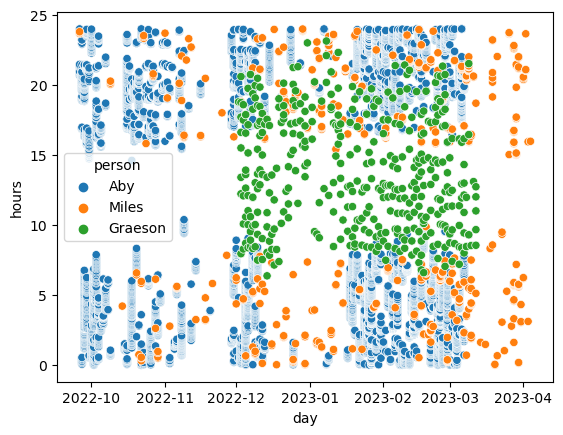

In [40]:
# This shows timestamps by day starting in late 2022 going through to whoever had the most recent data
# The y-axis is hours after midnight. example would be hour 5 is 5:00am and hour 17 is 5:00pm
sns.scatterplot(data = combined, x = "day", y = "hours", hue = "person")

## PART 4:  Analyze and visualize an additional element from  your personal data